# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу Вы увидите, какая математика за этим стоит, а заодно познакомитесь с основными библиотеками Python, необходимыми для дальнейшего прохождения курса.

**Материалы**

- Лекции данного курса по линейным моделям и градиентному спуску
- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [40]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

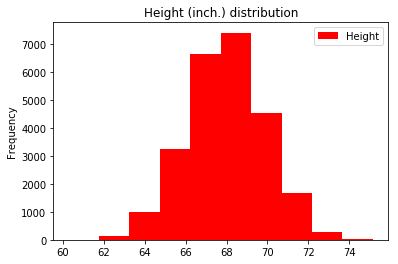

In [41]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [42]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


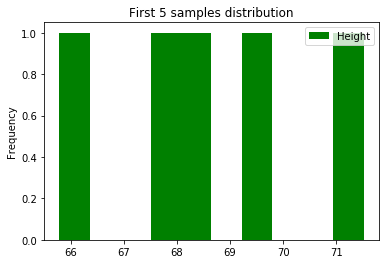

In [43]:
data.head(5).plot(y="Height", kind="hist", color="green",  title="First 5 samples distribution")


Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [44]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [45]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

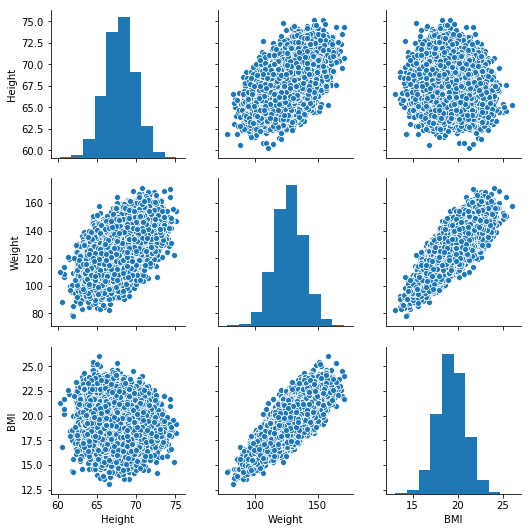

In [46]:
sns.pairplot(data=data, vars=[ 'Height','Weight','BMI'])

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

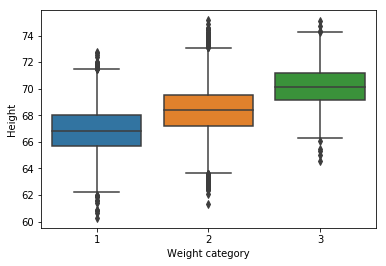

In [47]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >=150:
        return 3
    return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(data=data, x=data['weight_cat'], y=data["Height"]).set(
    xlabel='Weight category', 
    ylabel='Height'
)
plt.show()

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

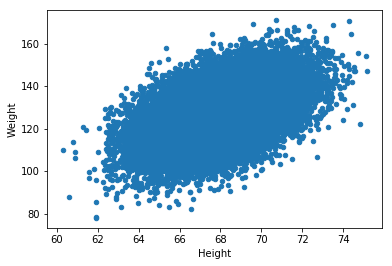

In [48]:
data.plot(x="Height", y="Weight", kind="scatter")
plt.show()

## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

**ВАЖНО!** Ниже сделаем несколько реализаций функции расчета ошибки и проверим скорость их работы - так как нам нужно будет запускать данный расчет на сравнительно большом объеме данных. Итак:

* super_simple_quadratic_error_function - реализация "в лоб" через цикл.
* scalar_quadratic_error_function - реализация через операцию скалярного произведения, определенную в numpy.array
* vector_quadratic_error_function - реализация через операцию умножения матриц, определенную для pandas.DataSet

In [49]:
def super_simple_quadratic_error_function(w0, w1):
    res = 0
    for i, height in enumerate(data["Height"]):
        res += (height - w0 - w1*data["Weight"][i+1])**2
    return res
%timeit res = super_simple_quadratic_error_function(60, 0.16)

1 loop, best of 3: 232 ms per loop


In [50]:
def scalar_quadratic_error_function(w0, w1):
    return np.sum((data["Height"] - (w0*np.ones(data.shape[0]) + w1*data["Weight"]))**2)
%timeit res = scalar_quadratic_error_function(60, 0.16)    

1000 loops, best of 3: 1.43 ms per loop


In [51]:
def vector_quadratic_error_function(w0, w1):
    temp_df = data.copy(deep=True)
    temp_df.insert(loc=1, column = "Coeff", value = 1)
    del temp_df["weight_cat"]
    del temp_df["BMI"]
    param_vector = pd.DataFrame([1, -1.*w0, -1.*w1],["Height","Coeff","Weight"], columns=["Value"])
    res_df = temp_df.dot(param_vector)**2
    return res_df.sum()

%timeit res = vector_quadratic_error_function(60, 0.16)    

100 loops, best of 3: 3.37 ms per loop


Ниже проведем простой тест на корректность вычислений. Все 3 реализации функции должны давать одинаковый результат на одинаковых входных данных:

In [52]:
test_data = [(60, 0.16),(50, 0.1),(60, 0.05),(100, -5),(30, 10)]
print "Equity test"
for param in test_data:
    print ("sup. simple: ", super_simple_quadratic_error_function(param[0], param[1]),
           " | scalar: ",scalar_quadratic_error_function(param[0], param[1]),
           " | vector: ",vector_quadratic_error_function(param[0], param[1]))

Equity test
('sup. simple: ', 3894862.142936876, ' | scalar: ', 3894862.1429368784, ' | vector: ', Value    3.894862e+06
dtype: float64)
('sup. simple: ', 766971.7346801093, ' | scalar: ', 766971.7346801083, ' | vector: ', Value    766971.73468
dtype: float64)
('sup. simple: ', 138197.3794281683, ' | scalar: ', 138197.3794281693, ' | vector: ', Value    138197.379428
dtype: float64)
('sup. simple: ', 9189853905.327341, ' | scalar: ', 9189853905.327328, ' | vector: ', Value    9.189854e+09
dtype: float64)
('sup. simple: ', 38329406523.29122, ' | scalar: ', 38329406523.291176, ' | vector: ', Value    3.832941e+10
dtype: float64)


**ВАЖНО!** Как мы видим наибольшую эффективность вычисления имеет функция **"scalar_quadratic_error_function"**, которая отрабатывает в среднем за 1.41 мсек. Поэтому далее мы будем использовать ее.

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

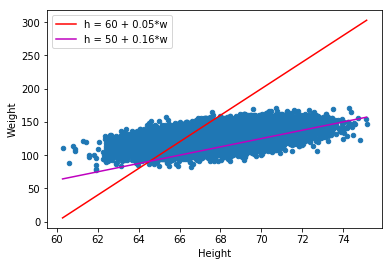

In [53]:
height_space = np.linspace(data["Height"].min(), data["Height"].max(), 1000)

# делаем обратную функцию значения веса от роста w(h)
line1 = lambda h: (h-60.)/0.05
line2 = lambda h: (h-50.)/0.16

data.plot(x="Height", y="Weight", kind="scatter")
plt.plot(height_space,[line1(x) for x in height_space] , "r-", label="h = 60 + 0.05*w")
plt.plot(height_space,[line2(x) for x in height_space] , "m-", label="h = 50 + 0.16*w")
plt.legend()
plt.show()

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

**ВАЖНО!** Выведем несколько графиков для разных значений w0, чтобы показать как график незначительно видоизменяется по данной оси. Данные изменения не заметны при анализе поверхности {w0,w1,Error}

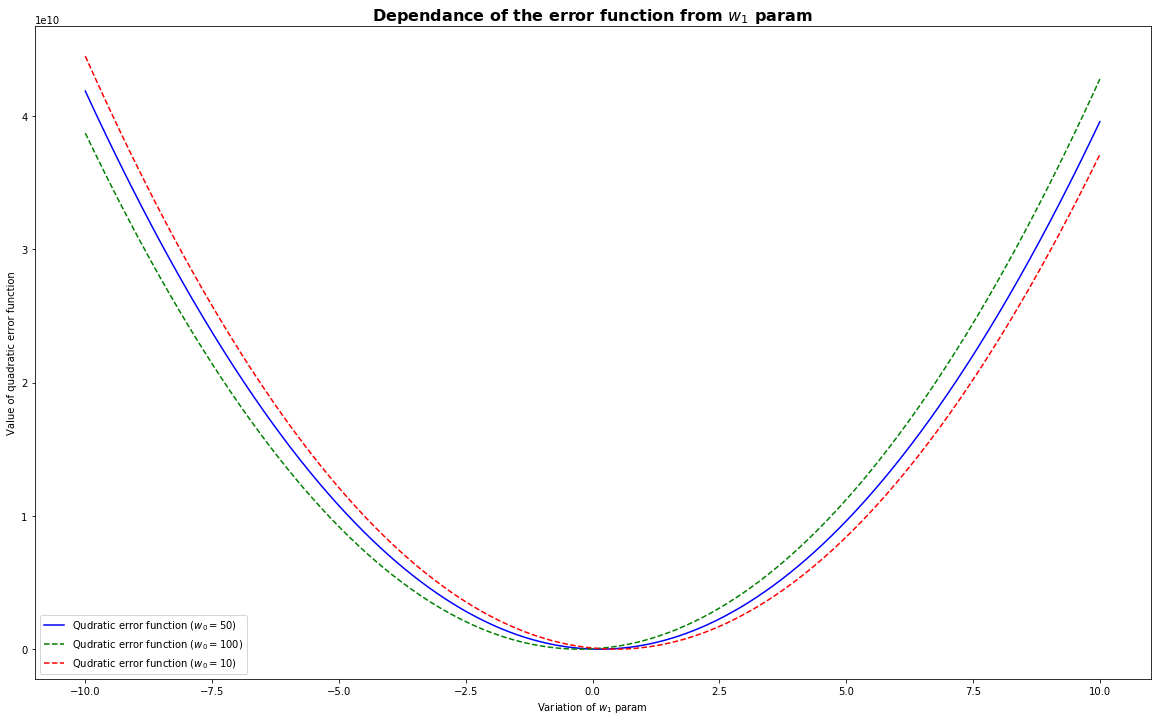

In [54]:
# Ваш код здесь
w1_space = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
fig.set_size_inches(20,12)
ax.set_title("Dependance of the error function from $w_{1}$ param", fontdict= {"color":  "black","weight": "bold", "size": 16})
ax.set_xlabel("Variation of $w_{1}$ param")
ax.set_ylabel("Value of quadratic error function")
ax.plot(w1_space,[scalar_quadratic_error_function(50, w1) for w1 in w1_space], 
        "b-", label="Qudratic error function ($w_{0}=50$)")
ax.plot(w1_space,[scalar_quadratic_error_function(100, w1) for w1 in w1_space], 
        "g--", label="Qudratic error function ($w_{0}=100$)")
ax.plot(w1_space,[scalar_quadratic_error_function(10, w1) for w1 in w1_space], 
        "r--", label="Qudratic error function ($w_{0}=10$)")

ax.legend()
plt.show()

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [55]:
# Ваш код здесь
from scipy import optimize
w1_opt = optimize.minimize_scalar(fun=lambda w1: scalar_quadratic_error_function(50.,w1), method='brent', bounds=(-5, 5))
print "The minimum point in case w0 = 50 is w1 =", w1_opt.x

The minimum point in case w0 = 50 is w1 = 0.1410920372883438


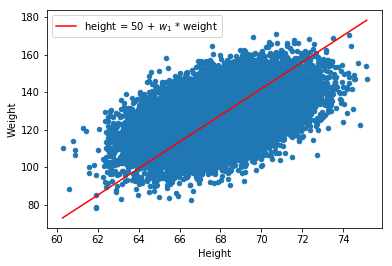

In [56]:
height_space = np.linspace(data["Height"].min(), data["Height"].max(), 1000)

# делаем обратную функцию значения веса от роста w(h) с использованием замыкания на w1_opt
scalar_approximation_func = lambda h: (h-50.)/w1_opt.x

data.plot(x="Height", y="Weight", kind="scatter")
plt.plot(height_space,[scalar_approximation_func(x) for x in height_space] , "r-", label="height = 50 + $w_{1}$ * weight")
plt.legend()
plt.show()

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [57]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

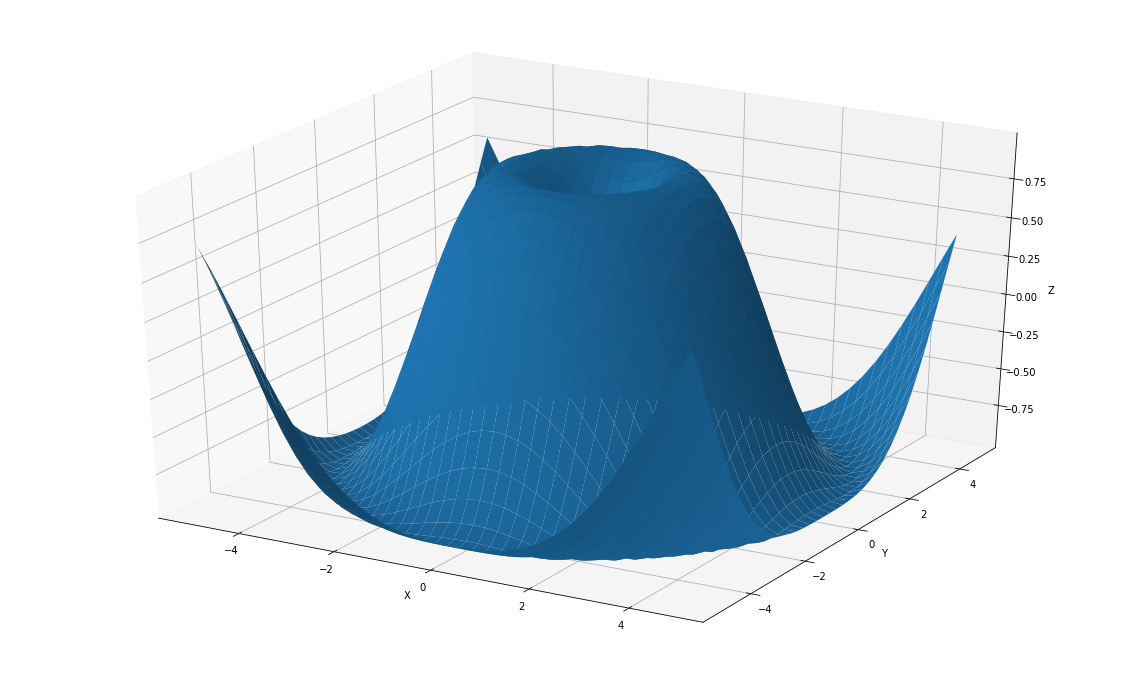

In [58]:
fig = plt.figure()
fig.set_size_inches(20,12)
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

In [59]:
w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-100, 100.25, 0.25)
w0, w1 = np.meshgrid(w0,w1)
error = np.zeros_like(w0)
error_fun_args_list = list() # сохряняем линейный набор аргументов для использования в функции scipy.optimize.minimize(...)
for idx, val in np.ndenumerate(w0):
    error_fun_args_list.append((val, w1[idx[0]][idx[1]]))
    error[idx[0]][idx[1]]=scalar_quadratic_error_function(error_fun_args_list[-1][0], error_fun_args_list[-1][1])

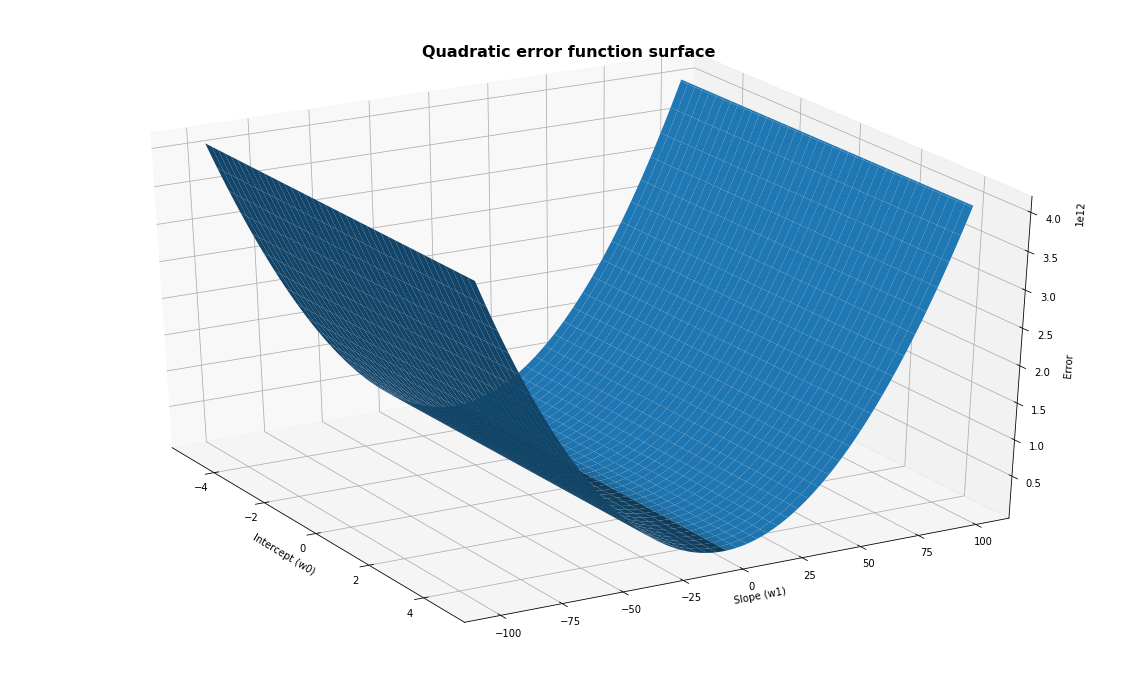

In [60]:
fig = plt.figure()
fig.set_size_inches(20,12)
ax = fig.gca(projection='3d') # get current axis
ax.view_init(30, -30)
surf = ax.plot_surface(w0, w1, error)
ax.set_xlabel('Intercept (w0)')
ax.set_ylabel('Slope (w1)')
ax.set_zlabel('Error')
plt.title("Quadratic error function surface", fontdict= {"color":  "black","weight": "bold", "size": 16})
plt.show()

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [63]:
w0_w1_surface_minimum = optimize.minimize(
                                            fun=lambda vector: scalar_quadratic_error_function(vector[0], vector[1]),
                                            x0=[0.,0.], 
                                            method="L-BFGS-B", 
                                            bounds=[(-100.,100.),(-5.,5.)]
                                         )
print "The minimal point on surface: w0={0} w1={1}".format(w0_w1_surface_minimum.x[0],w0_w1_surface_minimum.x[1])

The minimal point on surface: w0=57.5717875326 w1=0.0820064018421


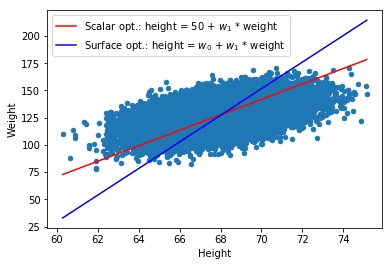

In [64]:
# Ваш код здесь
height_space = np.linspace(data["Height"].min(), data["Height"].max(), 1000)

# делаем обратную функцию значения веса от роста w(h) с использованием замыкания на w1_opt
scalar_approximation_func = lambda h: (h-50.)/w1_opt.x
# делаем обратную функцию значения веса от роста w(h) с использованием замыкания на структуру w0_w1_surface_minimum
surface_approximation_func = lambda h: (h-w0_w1_surface_minimum.x[0])/w0_w1_surface_minimum.x[1]

data.plot(x="Height", y="Weight", kind="scatter")

plt.plot(height_space,[scalar_approximation_func(x) for x in height_space] , "r-", 
         label="Scalar opt.: height = 50 + $w_{1}$ * weight")
plt.plot(height_space,[surface_approximation_func(x) for x in height_space] , "b-", 
         label="Surface opt.: height = $w_{0}$ + $w_{1}$ * weight")
plt.legend()
plt.show()

## Критерии оценки работы

- Выполняется ли тетрадка IPython без ошибок? (15 баллов)
- Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображен scatter plot роста от веса из п. 5? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Правильно ли реализована функция подсчета квадратичной ошибки из п. 6? (10 баллов)
- Правильно ли нарисован график из п. 7? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован график из п. 8? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize\_scalar из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 9? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован 3D-график из п. 10? (6 баллов) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 11? (3 балла). Правильно ли оформлены подписи? (1 балл)